In [611]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Read in data

In [612]:
props = pd.read_csv('../datasets/train.csv')

In [613]:
props.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [614]:
props.shape

(2051, 81)

In [615]:
props.set_index('Id', inplace = True)

# Check and categorize numeric vs categorical columns

## Numeric columns

In [616]:
initial_numeric_columns = props.select_dtypes(include = [np.number])

## Non-numeric (presumably categorical) columns

In [617]:
initial_nonnumeric_columns = props.select_dtypes(exclude = [np.number])

# Look at missing values

In [618]:
null_cols = [(column, props[column].isnull().sum()) for column in props.columns if props[column].isnull().sum() > 0]
null_cols_df = pd.DataFrame(null_cols, columns= ['Feature', 'Missing Values'])
null_cols_df

,Feature,Missing Values
0,Lot Frontage,330
1,Alley,1911
2,Mas Vnr Type,22
3,Mas Vnr Area,22
4,Bsmt Qual,55
5,Bsmt Cond,55
6,Bsmt Exposure,58
7,BsmtFin Type 1,55
8,BsmtFin SF 1,1
9,BsmtFin Type 2,56


### Missing Non-numeric values

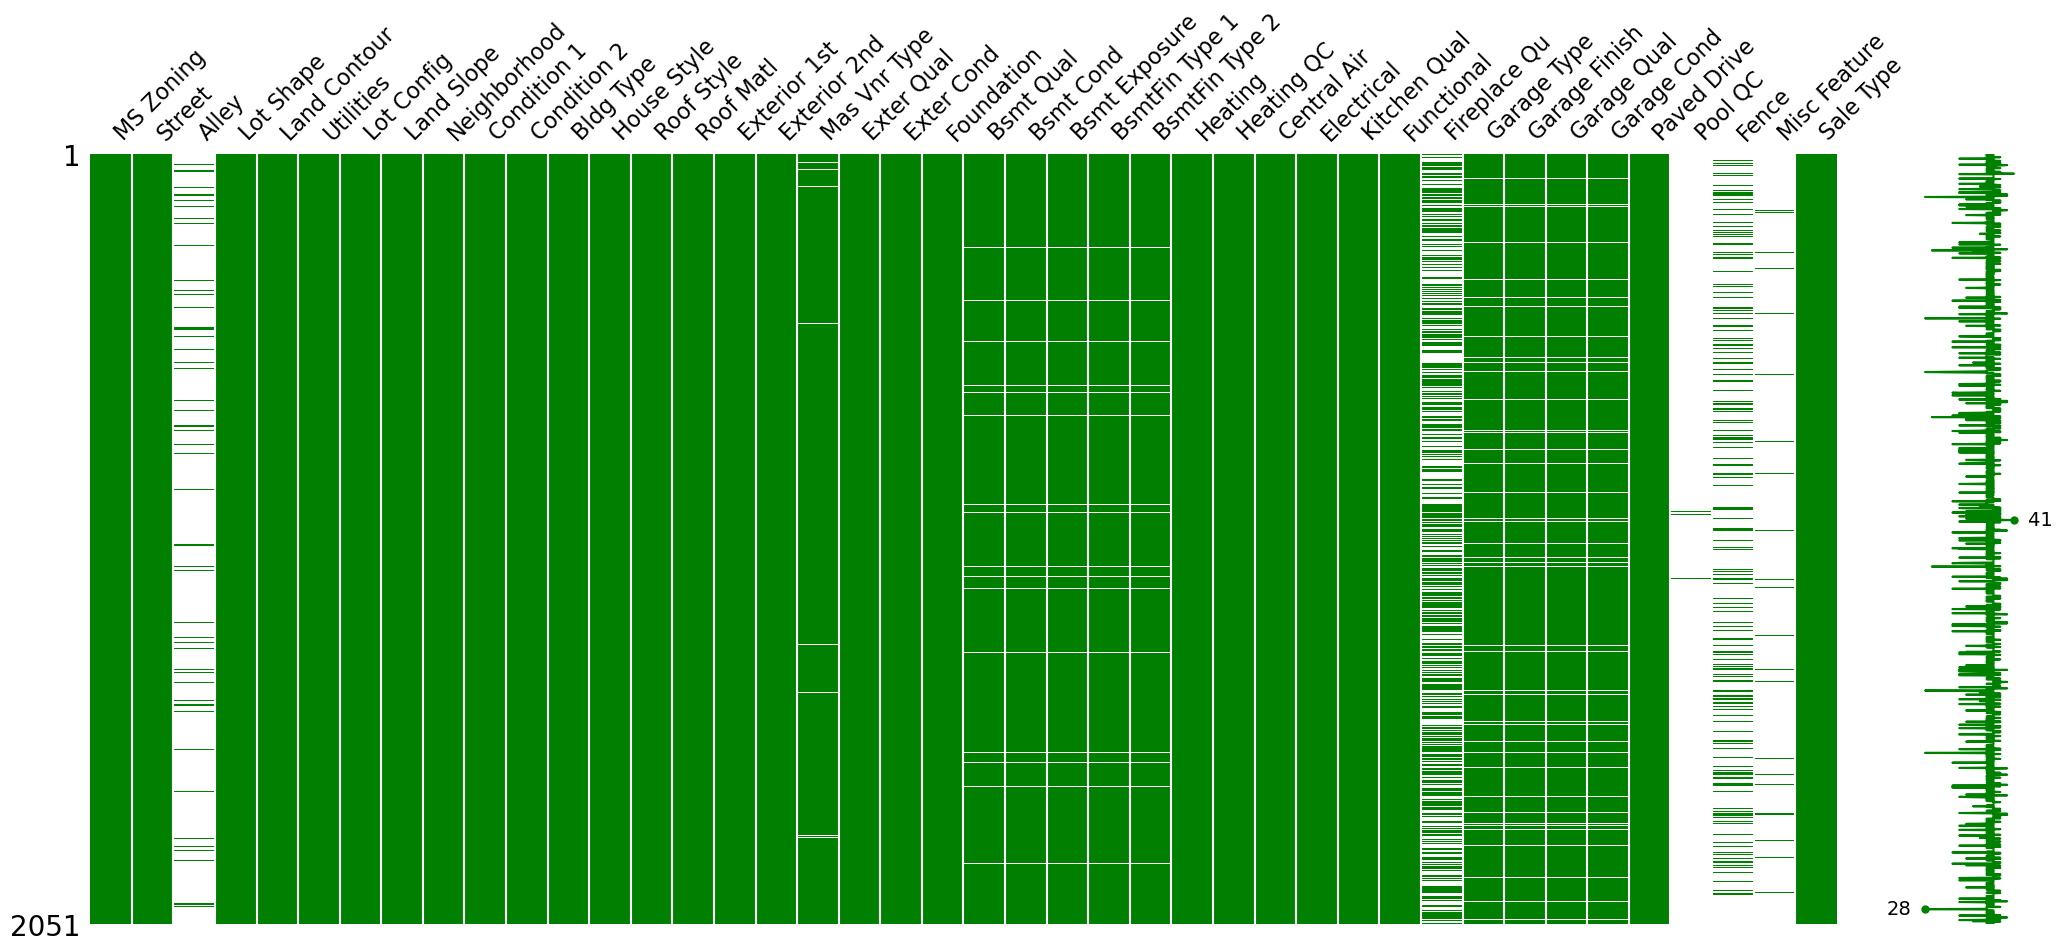

In [619]:
msno.matrix(initial_nonnumeric_columns, color = (0, 0.5, 0));

### Missing Numeric values

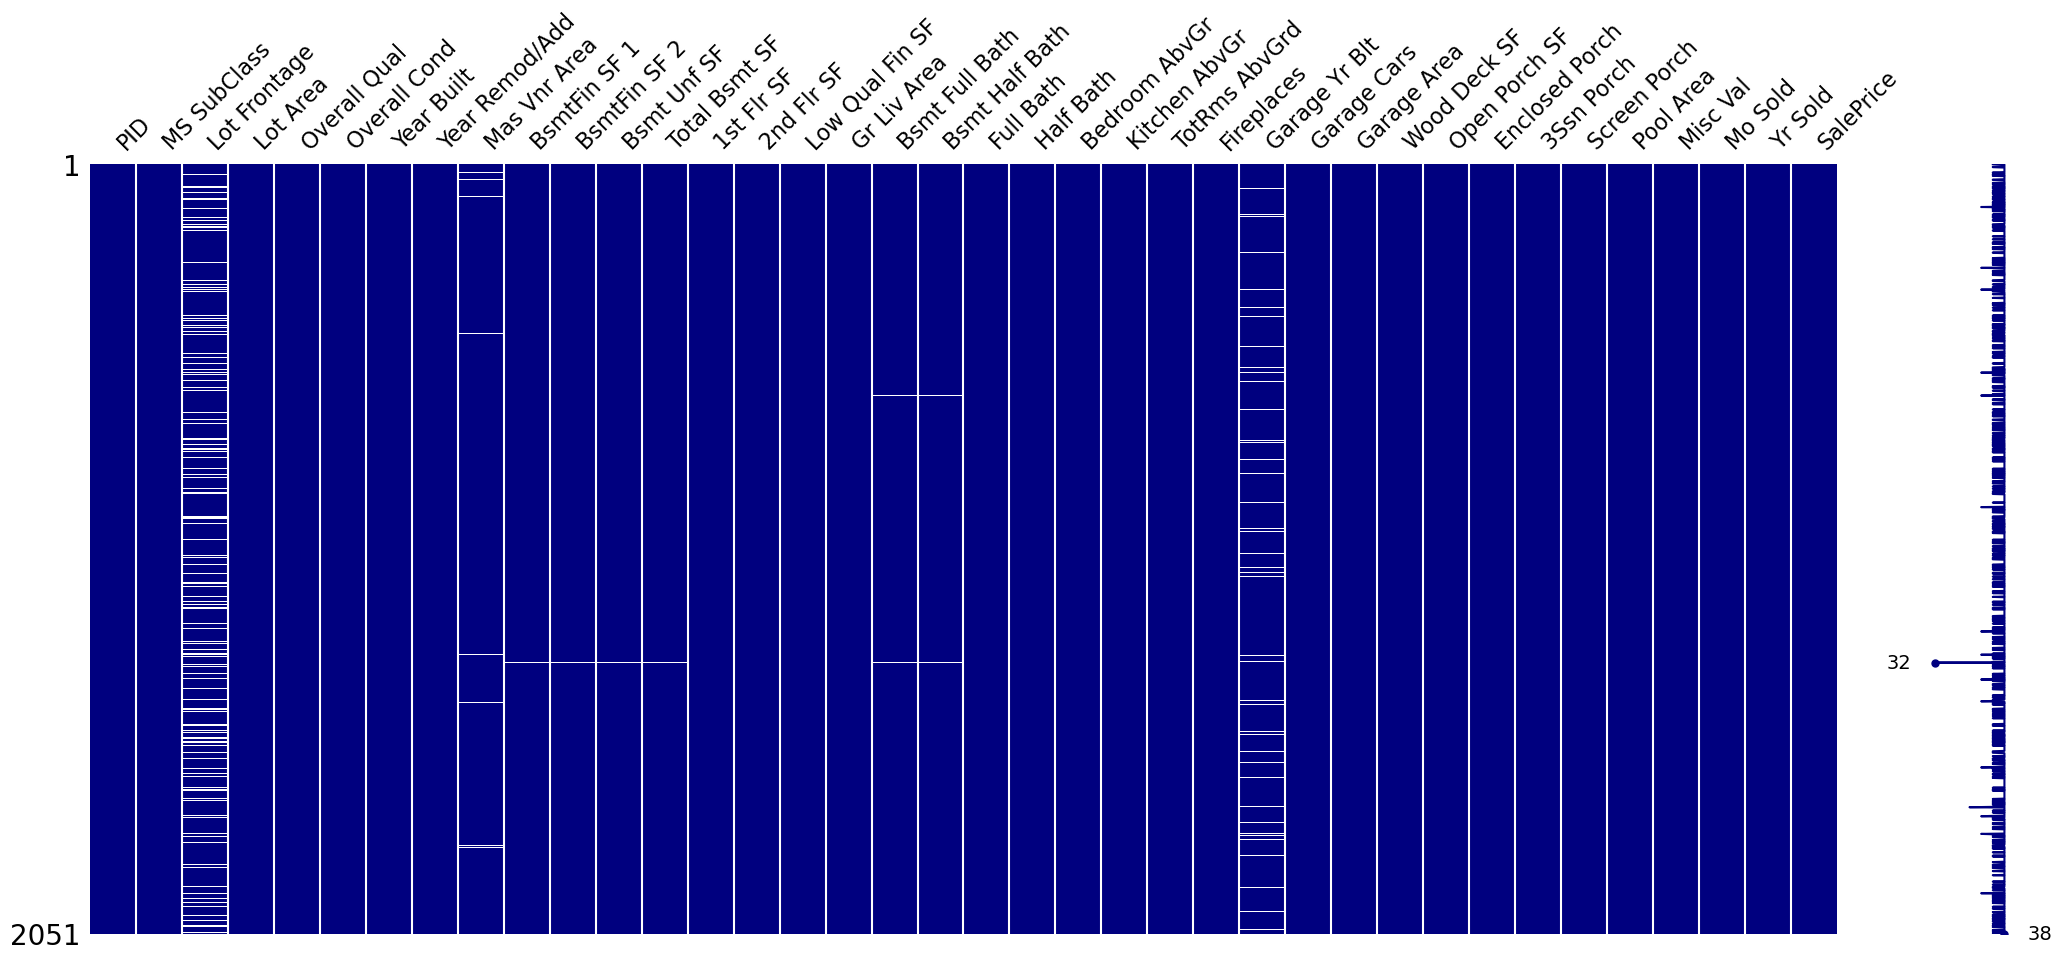

In [620]:
msno.matrix(initial_numeric_columns, color = (0, 0, 0.5));

### Drop missing rows for certain columns only

**Which columns and why?** 
- Msn Vnr Type, Mas Vnr Area
    - Because "None" is already a value on this scale, indicating these are truly missing. Value of including the feature is higher than ~1 of the data. 
- Bsmt Qual, Bsmnt Cond
    - Because "NA" is already a value on this scale, indicating these are truly missing.
- Garage Cars, Garage Area
    - There is only one row missing these values. Could be imputed but given it's a single line, will drop

In [621]:
props['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [622]:
columns_with_Nan_to_drop = ['Mas Vnr Type', 'Mas Vnr Area','Garage Cars', 'Garage Area']

props.dropna(axis=0, subset = columns_with_Nan_to_drop, inplace = True)




In [623]:
# Check nulls
null_cols = [(column, props[column].isnull().sum()) for column in props.columns if props[column].isnull().sum() > 0]
null_cols_df = pd.DataFrame(null_cols, columns= ['Feature', 'Missing Values'])
null_cols_df

,Feature,Missing Values
0,Lot Frontage,324
1,Alley,1890
2,Bsmt Qual,55
3,Bsmt Cond,55
4,Bsmt Exposure,58
5,BsmtFin Type 1,55
6,BsmtFin SF 1,1
7,BsmtFin Type 2,56
8,BsmtFin SF 2,1
9,Bsmt Unf SF,1


In [624]:
def replace_NaN_with_NA(columns):
    for column in columns:
        props[column].replace(np.NaN, 'NA', inplace = True)
    return None

### Investigate and address missing Fireplace Qu values 

In [625]:
NaN_fireplaces = props.loc[props['Fireplace Qu'].isnull(), ['Fireplaces', 'Fireplace Qu']]
NaN_fireplaces.shape

(991, 2)

In [626]:
NaN_fireplaces[NaN_fireplaces['Fireplaces'] == 0].shape

(991, 2)

From the above we can determine that every NaN in Fireplace Qu is aligned with an intentional "0" fireplaces, indicating that these should have been "NA" (per the 
data dictionary), not None
Decision: **Replace NaN with 'NA'**

In [627]:
# props['Fireplace Qu'].replace(np.NaN, 'NA', inplace = True)

replace_NaN_with_NA(['Fireplace Qu'])

In [628]:
props['Fireplace Qu'].value_counts()

NA    991
Gd    514
TA    402
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

### Investigate and address missing Lot Frontage values

In [629]:
# Cond 1 and 2 seem to be the closest category related to lot frontage (abutting streets/railroads)
NaN_LF = props.loc[props['Lot Frontage'].isnull(), ['Condition 1', 'Condition 2']]
NaN_LF['Condition 1'].value_counts()

Norm      285
Feedr      14
PosN        9
RRAe        5
RRNn        3
Artery      2
RRNe        2
PosA        2
RRAn        2
Name: Condition 1, dtype: int64

It is difficult to infer why these are missing and there are too many to lose ( > 10% of the data). 

**Decision: Will likely be imputed or not included in model**

### Investigate and address missing Alley values

In [630]:
NaN_Alley = props.loc[props['Alley'].isnull(), ['Condition 1', 'Condition 2']]
NaN_Alley['Condition 1'].value_counts()

Norm      1628
Feedr      103
Artery      58
RRAn        33
PosN        26
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

It is difficult to infer why these are missing and there are too many to lose ( > 90% of the data). 

**Decision: Will likely not be included in model**

### Investigate and address missing Garage values

In [631]:
# Based on MissingNo matrix above, it seems very likely these missing values are on same rows

In [632]:
#NaN_garage = 
props.loc[(props['Garage Qual'].isnull()), ['Garage Cars', 'Garage Area']].value_counts()

Garage Cars  Garage Area
0.0          0.0            112
dtype: int64

Seems that these were deliberately marked a 0 car garages, which indicates No Garage or "NA" rather than NaN. Also, garage year is dependent on the year the house was built.

**Decision: Garage NaNs will be replaced with NA, with the exception of Garage Yr Blt which will in all likelihood be dropped**

In [633]:
replace_NaN_with_NA(['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'])

In [634]:
# Check nulls
null_cols = [(column, props[column].isnull().sum()) for column in props.columns if props[column].isnull().sum() > 0]
null_cols_df = pd.DataFrame(null_cols, columns= ['Feature', 'Missing Values'])
null_cols_df

,Feature,Missing Values
0,Lot Frontage,324
1,Alley,1890
2,Bsmt Qual,55
3,Bsmt Cond,55
4,Bsmt Exposure,58
5,BsmtFin Type 1,55
6,BsmtFin SF 1,1
7,BsmtFin Type 2,56
8,BsmtFin SF 2,1
9,Bsmt Unf SF,1


### Investigate and address missing Basement values

In [635]:
# None of the basement values had NA recorded, indicating that the NaN is likely intended to be NA but was left blank

replace_NaN_with_NA(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'])

### Investigate and address missing Pool QC values

In [636]:
props.loc[(props['Pool QC'].notnull()), ['Pool Area']]

,Pool Area
Id,
2351,519
1567,576
2499,800
2231,228
1499,480
2358,648
2736,738
1941,368
2279,561


This pool data seems too sparse to be of use. There are only 8 properties with pools.

**Decision: Pool QC and Pool Area to be dropped**

### Investigate and address missing Fence values

In [637]:
props['Fence'].value_counts()

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

There are no naturally occurring "NA", which would suggest a missing value was likely meant to be NA


**Decision: Replace NaN with NA, Fence may or may not be used in model**

In [638]:
replace_NaN_with_NA(['Fence'])

### Investigate and address missing "MiscFeature" values

In [639]:
props['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

Misc Feature data is too sparse to be of use, with 62 of ~1900 rows of data


**Decision: No cleaning needed, will be dropped**

In [640]:
# Check nulls
null_cols = [(column, props[column].isnull().sum()) for column in props.columns if props[column].isnull().sum() > 0]
null_cols_df = pd.DataFrame(null_cols, columns= ['Feature', 'Missing Values'])
null_cols_df

,Feature,Missing Values
0,Lot Frontage,324
1,Alley,1890
2,BsmtFin SF 1,1
3,BsmtFin SF 2,1
4,Bsmt Unf SF,1
5,Total Bsmt SF,1
6,Bsmt Full Bath,2
7,Bsmt Half Bath,2
8,Garage Yr Blt,112
9,Pool QC,2019


## A fresh look at the dataframe, with NaNs cleaned and irrelevant columns with NaNs dropped

In [641]:
props.drop(['PID','Alley', 'Garage Yr Blt', 'Pool QC', 'Misc Feature'], axis = 1,  inplace = True)

In [642]:
props.shape

(2028, 75)

### Investigate categorical variables to see if anything can be transformed into a numeric value

In [643]:
post_clean_numeric_columns = props.select_dtypes(include = [np.number])
post_clean_nonnumeric_columns = props.select_dtypes(exclude = [np.number])

In [644]:
# Check nulls
null_cols = [(column, props[column].isnull().sum()) for column in props.columns if props[column].isnull().sum() > 0]
null_cols_df = pd.DataFrame(null_cols, columns= ['Feature', 'Missing Values'])
null_cols_df

,Feature,Missing Values
0,Lot Frontage,324
1,BsmtFin SF 1,1
2,BsmtFin SF 2,1
3,Bsmt Unf SF,1
4,Total Bsmt SF,1
5,Bsmt Full Bath,2
6,Bsmt Half Bath,2


In [645]:
unique_values_per_nonnumeric_column = [(column, len(post_clean_nonnumeric_columns[column].unique())) for column in post_clean_nonnumeric_columns.columns]

In [646]:
unique_values_per_nonnumeric_column

[('MS Zoning', 7),
 ('Street', 2),
 ('Lot Shape', 4),
 ('Land Contour', 4),
 ('Utilities', 3),
 ('Lot Config', 5),
 ('Land Slope', 3),
 ('Neighborhood', 28),
 ('Condition 1', 9),
 ('Condition 2', 8),
 ('Bldg Type', 5),
 ('House Style', 8),
 ('Roof Style', 6),
 ('Roof Matl', 6),
 ('Exterior 1st', 15),
 ('Exterior 2nd', 15),
 ('Mas Vnr Type', 4),
 ('Exter Qual', 4),
 ('Exter Cond', 5),
 ('Foundation', 6),
 ('Bsmt Qual', 6),
 ('Bsmt Cond', 6),
 ('Bsmt Exposure', 5),
 ('BsmtFin Type 1', 7),
 ('BsmtFin Type 2', 7),
 ('Heating', 5),
 ('Heating QC', 5),
 ('Central Air', 2),
 ('Electrical', 5),
 ('Kitchen Qual', 4),
 ('Functional', 8),
 ('Fireplace Qu', 6),
 ('Garage Type', 7),
 ('Garage Finish', 4),
 ('Garage Qual', 6),
 ('Garage Cond', 6),
 ('Paved Drive', 3),
 ('Fence', 5),
 ('Sale Type', 9)]

In [647]:
possible_bools = [ (column, counts) for column, counts in unique_values_per_nonnumeric_column if (counts == 2)]
possible_bools

[('Street', 2), ('Central Air', 2)]

## Transform Street into a bool called Paved Street

In [648]:
props['Street'].value_counts()

Pave    2021
Grvl       7
Name: Street, dtype: int64

In [649]:
# Replace every 'Pave' with a 1 so the column header is accurate
props['Street'] = props['Street'].str.contains('Pave').astype(int)

In [650]:
props.rename({'Street' : 'Paved Street'}, axis = 1, inplace = True)

In [651]:
props['Paved Street'].value_counts()

1    2021
0       7
Name: Paved Street, dtype: int64

## Transform Utilities into a bool called Has All Utilities

Went this route because there is only one single row without all utilities

In [652]:
props['Utilities'].value_counts()

AllPub    2026
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [653]:
props['Utilities'] = props['Utilities'].str.contains('AllPub').astype(int)

In [654]:
props.rename({'Utilities' : 'Has All Utilities'}, axis = 1, inplace = True)

## Transform Central Air into a bool


In [655]:
props['Central Air'].value_counts()

Y    1887
N     141
Name: Central Air, dtype: int64

In [656]:
props['Central Air'] = props['Central Air'].str.contains('').astype(int)

In [657]:
props.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Paved Street,Lot Shape,Land Contour,Has All Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,1,IR1,Lvl,1,CulDSac,Gtl,...,0,0,0,0,NA,0,3,2010,WD,130500
544,60,RL,43.0,11492,1,IR1,Lvl,1,CulDSac,Gtl,...,0,0,0,0,NA,0,4,2009,WD,220000
153,20,RL,68.0,7922,1,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,NA,0,1,2010,WD,109000
318,60,RL,73.0,9802,1,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,NA,0,4,2010,WD,174000
255,50,RL,82.0,14235,1,IR1,Lvl,1,Inside,Gtl,...,0,0,0,0,NA,0,3,2010,WD,138500


Look for missing categorical data

### Explore numeric data 

In [658]:
post_clean_numeric_columns.iloc[:, :15].describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF
count,2028.000000,1704.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2027.000000,2027.000000,2027.000000,2027.000000,2028.000000,2028.000000,2028.000000
mean,57.098126,69.009390,10054.636095,6.099606,5.568540,1971.396943,1983.969921,99.745069,441.792304,48.356685,566.244697,1056.393685,1163.613412,328.250493,5.575444
std,42.937854,23.253408,6755.076471,1.425312,1.107777,30.136897,21.040862,174.992265,460.782979,165.766774,444.430865,449.508848,395.820141,425.199615,51.354392
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,220.000000,792.500000,879.750000,0.000000,0.000000
50%,50.000000,68.000000,9402.500000,6.000000,5.000000,1973.500000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1092.000000,0.000000,0.000000
75%,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,161.250000,733.000000,0.000000,810.000000,1315.000000,1402.250000,689.000000,0.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000


### Convert numeric data to categorical data where appropriate

In [659]:
props['MS SubClass'] = props['MS SubClass'].astype(str)
props['Overall Qual'] = props['Overall Qual'].astype(str)
props['Overall Cond'] = props['Overall Cond'].astype(str)

In [660]:
post_clean_numeric_columns.iloc[:, 15:].describe()

,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2028.000000,2026.000000,2026.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.00000,2028.000000,2028.000000,2028.000000
mean,1497.439349,0.427443,0.064166,1.571992,0.367850,2.844181,1.042899,6.435404,0.589744,1.773176,...,94.061144,47.139546,22.526134,2.620809,16.698718,2.425049,52.15927,6.209566,2007.779093,180904.796844
std,501.495868,0.522971,0.253039,0.547898,0.499424,0.827727,0.209856,1.563417,0.638614,0.765454,...,128.893581,66.445075,59.735099,25.370830,57.671676,37.995453,576.61144,2.741623,1.314230,79139.782650
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,12789.000000
25%,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000,129500.000000
50%,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,161000.000000
75%,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,213492.500000
max,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.00000,12.000000,2010.000000,611657.000000


In [661]:
props.dtypes

MS SubClass      object
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Paved Street      int32
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 75, dtype: object

In [662]:
post_clean_numeric_columns = props.select_dtypes(include = [np.number])
post_clean_nonnumeric_columns = props.select_dtypes(exclude = [np.number])

In [663]:
post_clean_nonnumeric_columns.iloc[:, 16:30]

,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Electrical,Kitchen Qual
Id,,,,,,,,,,,,,,
109,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd
544,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd
153,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,SBrkr,Gd
318,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,SBrkr,TA
255,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,SBrkr,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd
785,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,SBrkr,TA
916,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,SBrkr,TA


ValueError: could not convert string to float: 'NA'